In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('training_set.csv',index_col=0)
X = df.drop(columns=['Y'])
y = df['Y']
print((df['Y'] == 0).sum(),(df['Y'] != 0).sum()) #60:40
# make synthetic samples for resampling (SMOTE)

2376 1534


In [3]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81


## Imbalanced Data
### SMOTE 
- SMOTE synthetically makes new samples to balance data. 
- Almost always preferred over RandomOversampling
    - Data appears continuous so legality isn't too much of a question
- Model did not underperform after SMOTE, but did not have too much of an impact either
### RandomOversampling
- Did not have too much of an impact on validation

### Choice: SMOTE, can help with any imbalance eitherway

In [4]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE() 
X,y = sampler.fit_resample(X,y)

In [5]:
print((y==0).sum(),(y!=0).sum())

2376 2376


# Data Visualization
- T-SNE and PCA plots

In [6]:
X.shape

(4752, 57)

In [7]:
## normalize and Standardize
X = np.array(X)
X_norm = X/np.linalg.norm(X,axis=0) 
X_std = (X-np.mean(X,axis=0))/np.std(X,axis=0)

<IPython.core.display.Javascript object>


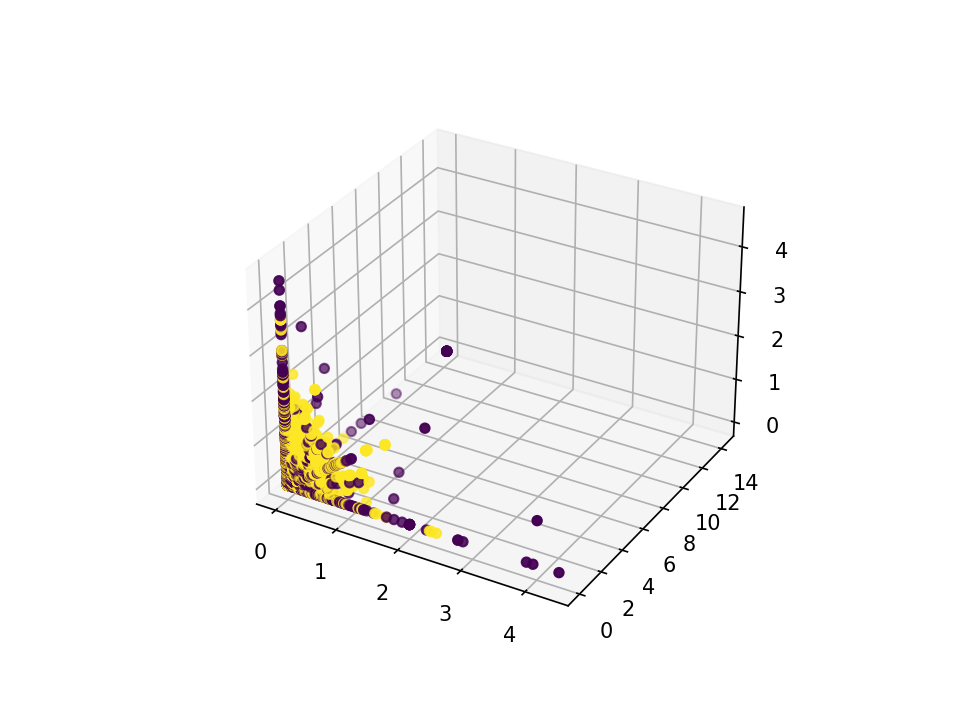

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plot = plt.figure()
ax = plot.add_subplot(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],c=y) # 3 random dimensions first
plt.show()

- The data _looks_ gaussian: Most of the data concentrated in one location with data dipping in extremes
- Standardize the data over normalize

<IPython.core.display.Javascript object>


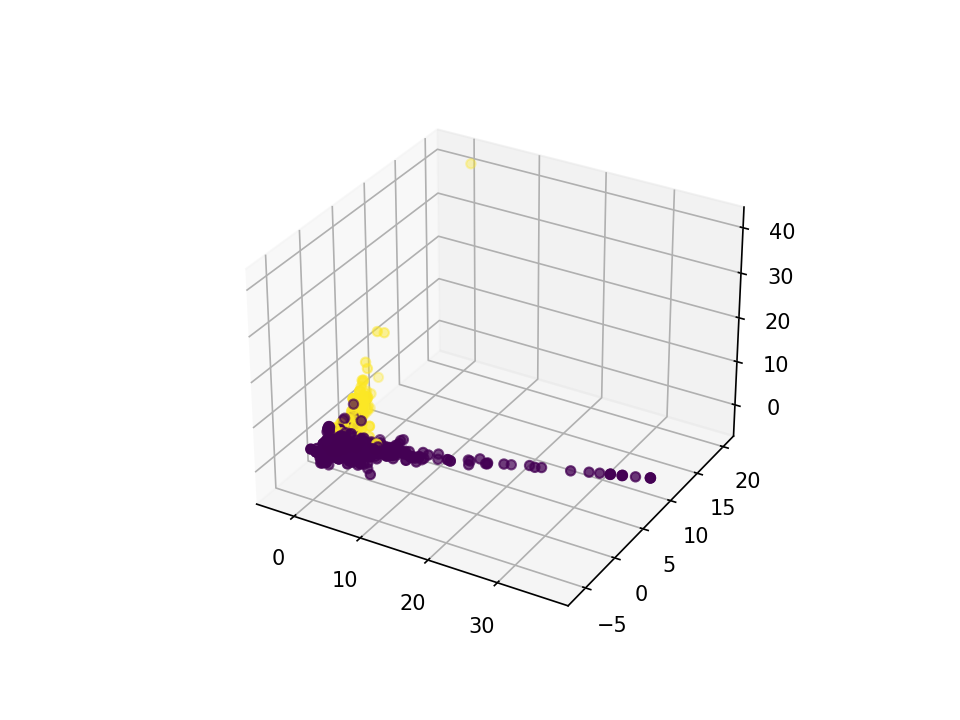

In [9]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_std)

plot = plt.figure()
ax = plot.add_subplot(projection='3d')

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y)
plt.show()

In [10]:
tsne = TSNE(n_components=3,perplexity=30,learning_rate='auto',init='pca') # changing perplexity or initialization doesn't have much effect
w  = tsne.fit_transform(X_std,y)                                         # perplexity between 5-30 

C:\Users\L12-o-0-554\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<IPython.core.display.Javascript object>


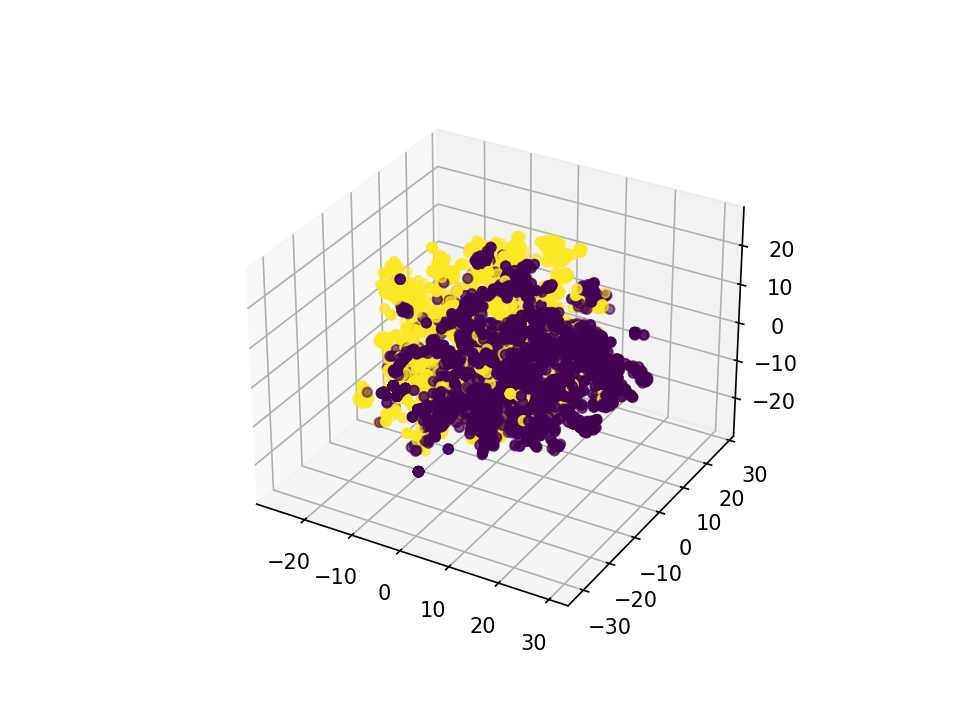

In [11]:
plot = plt.figure()
ax = plot.add_subplot(projection='3d')

ax.scatter(w[:,0],w[:,1],w[:,2],c=y)
plt.show()

## Analysis

- data can be linearly separable, but not completely
    - KPCA with rbf kernel did not show much difference from PCA

- can proceed to feature selection

## Feature Selection

### Manually
- Features that were mostly zero to be looked into
    - 2 issues:
    - Show some trend with y (such as feature 'X4' being non-zero leads to y being 1)
    - 49/57 features have at least 5% of data as non-zero

### PCA
- Using explained variance, one can eliminate features of less importance
    - This did not eliminate too many features, 48 features were required for 95% of the explained variance 
    - each feature can contribute to a decision
    
### Intrinsic Feature Selection -- Regularization
- L1 norm on LogisticRegression
- RandomForest max depth and number of estimators

### Results
- PCA can be used for the data 
- Models can have regularization

In [12]:
pca = PCA(n_components = 48,svd_solver = 'full')
X_fitted = pca.fit_transform(X_std)
print(sum(pca.explained_variance_ratio_)) # 48 features required 

0.9503358599409915


In [13]:
X_selected = X_std[:,(X != 0).sum(axis=0) >= 195]
X_selected.shape

(4752, 49)

In [14]:
(df[df['X4']!=0]['Y'] == 0).sum() ## most of non-zero X4 cells have Y=1

6

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,train_size=0.8) ## Choosing PCA
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_fitted,y,train_size=0.8) ## Choosing PCA
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_selected,y,train_size=0.8) ## Choosing manual

## Models

- Logistic Regression
- SVM
- RandomForest

In [16]:
lrclassifier = LogisticRegression(penalty='l1',solver='saga',max_iter=1000) ## intrinsic Feature selection using L1
lrclassifier.fit(X_pca_train,y_pca_train)
y_pred = lrclassifier.predict(X_pca_test)
print(accuracy_score(y_pca_test, y_pred))

0.9337539432176656


C:\Users\L12-o-0-554\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[x/2+1 for x in range(0,19)]}

svclassifier = SVC()
clf = GridSearchCV(svclassifier, parameters)
clf.fit(X_pca_train,y_pca_train)
print(clf.best_params_)

svclassifer = clf.best_estimator_
svclassifier.fit(X_pca_train,y_pca_train)
y_pred = svclassifier.predict(X_pca_test)
print(accuracy_score(y_pca_test, y_pred))

{'C': 8.5, 'kernel': 'rbf'}
0.9453207150368034


#### Randomforest grid search: did not have much of an impact
```
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(100,301,50), 'max_depth':range(10,15)}

classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_pca_train,y_pca_train)
print(clf.best_params_)

classifer = clf.best_estimator_
classifier.fit(X_pca_train,y_pca_train)
y_pred = classifier.predict(X_pca_test)
print(accuracy_score(y_pca_test, y_pred))
```

In [18]:
## Not too much of a change in accuracy after grid search: 

rfclassifier = RandomForestClassifier(max_depth=10, n_estimators=200)
rfclassifier.fit(X_pca_train,y_pca_train)
y_pred = rfclassifier.predict(X_pca_test)
print(accuracy_score(y_pca_test, y_pred))

0.9411146161934806


In [20]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump({'pca': pca, 'classifier': svclassifier},f)